## Note: please regrade for Q6, 7. Those were the two questions I lost points for. Thanks :)

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as c
import csv
import pandas as pd
from astropy.time import Time
from astropy.coordinates import solar_system_ephemeris, EarthLocation
from astropy.coordinates import get_body_barycentric, get_body, get_moon, SkyCoord
#loc = EarthLocation.of_address('Philadelphia')
loc = EarthLocation(lat='39d57m35s',lon='75d11m49s')
#np.savez('PhiladelphiaLocation.npz',loc=loc)
times = Time('2018-01-01 12:00')+np.linspace(0,365, 366)*u.day
yr_frac = times.decimalyear-2018.
sun = get_body('sun', times, loc)

In [27]:
def readMyFile(filename):
    transit_dst = []
    alt = []
    ra = []
    dec = []
    transit = []
 
    with open(filename) as csvDataFile:
        csvReader = csv.reader(csvDataFile)
        for row in csvReader:
            transit_dst.append(row[13])
            alt.append(row[14])
            ra.append(row[15])
            dec.append(row[16])
            transit.append(row[18])
 
    transit_dst = np.array(transit_dst[0:24],dtype='float64')*u.hr
    alt = np.array(alt[0:24],dtype='float64')*u.deg
    ra = np.array(ra[0:24],dtype='float64')*u.hr
    dec = np.array(dec[0:24],dtype='float64')*u.deg
    transit = np.array(transit[0:24],dtype='float64')*u.hr
    
    return transit, alt, ra, dec, transit_dst

## Question 1

In [28]:
#test_csv = pd.read_csv('SunMovements.csv')
test_excel = pd.read_excel('SunMovements.xlsx')
#transit, alt, ra, dec, transit_dst = readMyFile('SunMovements.csv')

In [29]:
test_excel.transit

0     12.073056
1     12.169722
2     12.238333
3     12.246667
4     12.216389
5     12.159444
6     12.075278
7     12.011667
8     11.963056
9     11.951111
10    11.976111
11    12.020833
12    12.076944
13    12.111944
14    12.117222
15    12.086111
16    12.010833
17    11.931111
18    11.838333
19    11.774167
20    11.738056
21    11.755833
22    11.830000
23    11.932222
Name: transit, dtype: float64

In [30]:
transit=np.array(test_excel.transit)

In [31]:
transit

array([ 12.07305556,  12.16972222,  12.23833333,  12.24666667,
        12.21638889,  12.15944444,  12.07527778,  12.01166667,
        11.96305556,  11.95111111,  11.97611111,  12.02083333,
        12.07694444,  12.11194444,  12.11722222,  12.08611111,
        12.01083333,  11.93111111,  11.83833333,  11.77416667,
        11.73805556,  11.75583333,  11.83      ,  11.93222222])

## Question 2

In [32]:
day_of_the_year=np.array(test_excel.day_of_the_year)
day_of_the_year


array([  1,  15,  32,  46,  60,  74,  91, 105, 121, 135, 152, 166, 182,
       196, 213, 227, 244, 258, 274, 288, 305, 319, 335, 349], dtype=int64)

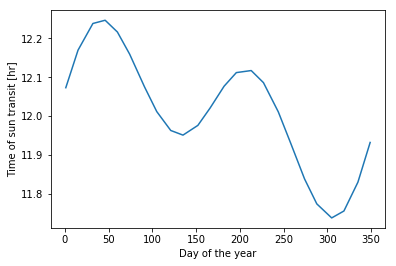

In [33]:
plt.plot(day_of_the_year, transit)
plt.ylabel('Time of sun transit [hr]')
plt.xlabel('Day of the year')
plt.show()

Q2.) The plot is cyclical and decreases over the days of the year. There are supposed to be two significant dips in the function due to daylight savings; I had corrected for it. <br>

In [38]:
max_transit = max(transit)
min_transit = min(transit)
avg_transit = sum(transit)/len(transit)

In [39]:
max_transit


12.246666666666666

In [40]:
min_transit

11.738055555555555

In [41]:
avg_transit

12.012685185185184

In [42]:
max_transit_dev = max_transit -12
min_transit_dev = min_transit -12
avg_transit_dev = avg_transit -12

In [43]:
max_transit_dev_units = (max_transit_dev*60) % 60
max_transit_dev_units

14.799999999999969

In [44]:
min_transit_dev_units = (min_transit_dev*60)% -60
min_transit_dev_units

-15.716666666666725

In [45]:
avg_transit_dev_units = (avg_transit_dev*60)%60
avg_transit_dev_units

0.76111111111103469

## Question 3

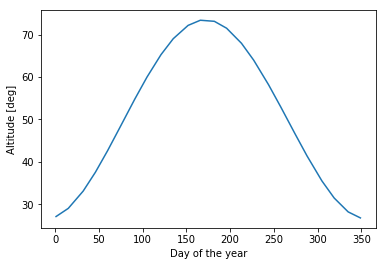

In [46]:
alt=np.array(test_excel.alt)
plt.plot(day_of_the_year,alt)
plt.ylabel('Altitude [deg]')
plt.xlabel('Day of the year')
plt.show()

In [47]:
ymax = max(alt)
ymax

73.370138888888889

Q3.) The average transit time deviation from noon is 0.76 minutes, while the maximum positive transit time deviation 
from noon is 14.79 min, and maximum negative transit time deviation from noon is -15.71 minutes.<br>
Q4.) On day 166/in the middle of the year the altitude is the highest. The lowest occurs on day 349, where the sun is 
26.761. The sun is also low at the beginning of the year. The sun never passes directly overhead because the Earth is 
on a 23.5 degree tilt and the sun would only pass directly overhead if you lived within ±23.5 degrees of the Equator. 
RA and Dec should be 0h and 0.0 degrees respectively at the vernal equinox. The data agrees because at March 15th, 
the dec is -19.393, and RA dips soon after, closer to April 1st.


## Question 5 & 6

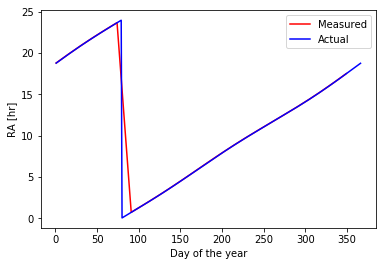

In [22]:
RA = np.array(test_excel.ra)
#days = np.array(test_excel.days_366)
total_days = list(range(1, 367))
array_of_days = np.asarray(total_days)
plt.plot(day_of_the_year,RA, 'r-',label='Measured')
plt.plot(array_of_days, sun.ra.hour, 'b-', label='Actual')
plt.legend()
plt.ylabel('RA [hr]')
plt.xlabel('Day of the year')
plt.show()


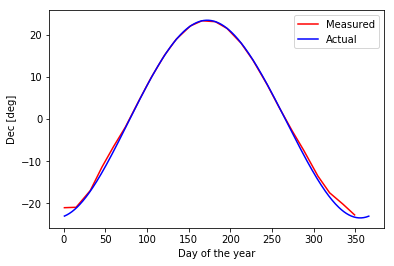

In [22]:
DEC = np.array(test_excel.dec)
plt.plot(day_of_the_year,DEC, 'r-', label='Measured')
plt.plot(array_of_days, sun.dec, 'b-', label='Actual')
plt.ylabel('Dec [deg]')
plt.xlabel('Day of the year')
plt.legend()
plt.show()


Q6.) They agree almost perfectly qualitatively. Somewhere around ~65-75 there is a jump discontinuity, and the jump is more
exact in the actual measurement, where the jump is completely vertical, unlike the measured where it still has a large slope.

Q6.) This agrees almost perfectly with our measured as well.

## Question 7

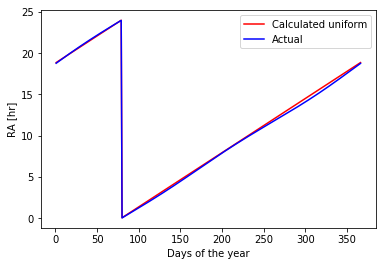

In [51]:
RA0 = 18.797
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = eval(formula)
    plt.plot(x, y, 'r-', label='Calculated uniform') 
    plt.plot(array_of_days, sun.ra.hour, 'b-', label='Actual')
    plt.xlabel('Days of the year')
    plt.ylabel('RA [hr]')
    plt.legend()
    plt.show()
    
graph('np.mod(RA0 + 24*(x/365), 24)', array_of_days)


This resembles the above RA over the days of the year graph.

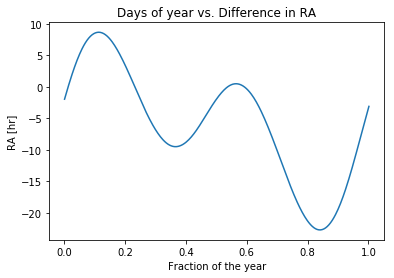

In [49]:
ra_uniform = np.mod(sun.ra.hour[0] + 24*yr_frac, 24)
yr_frac = times.decimalyear-2018
plt.plot(yr_frac, (sun.ra.hour-ra_uniform)*60)
plt.title('Days of year vs. Difference in RA')
plt.xlabel('Fraction of the year')
plt.ylabel('RA [hr]')
plt.show()

7.) This looks like the day of the year vs. the time of sun transit.